In [1]:
# Install the required libraries
!pip install prophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet

%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
# Upload the scarf-google-trends-data.csv file
from google.colab import files
uploaded = files.upload()

Saving dfa-generation-levels-detail-cleanedup.csv to dfa-generation-levels-detail-cleanedup.csv


In [7]:
# Read the data from the scarf-google-trends-data.csv file into a Pandas DataFrame
wealth_gap_df = pd.read_csv("dfa-generation-levels-detail-cleanedup.csv")
# wealth_gap_df.set_index('Year (Q4)', inplace=True)
# wealth_gap_df = wealth_gap_df.drop(['Unnamed: 5', 'Unnamed: 6'], axis=1)

# Update dataframe to include Year column based on date, this will be used to sum by year vs quarter
# Convert the 'Date' column to datetime
wealth_gap_df['Date'] = pd.to_datetime(wealth_gap_df['Date'], format='%Y:Q%m')

# Extract the year and create a new column 'Year'
wealth_gap_df['Year'] = wealth_gap_df['Date'].dt.year

# Review the DataFrame
wealth_gap_df.head(10)

,Date,Category,Assets,Liabilities,Net worth,Household count,Year
0,1989-03-01,Silent,17649120,1267424,16381696,48553376,1989
1,1989-03-01,BabyBoom,5808847,1831588,3977259,39289625,1989
2,1989-03-01,GenX,131077,53761,77316,5177100,1989
3,1989-03-01,Millennial,0,0,0,0,1989
4,1989-04-01,Silent,17908857,1290657,16618200,48581895,1989
5,1989-04-01,BabyBoom,5981476,1876276,4105200,39314788,1989
6,1989-04-01,GenX,151381,60610,90771,5366102,1989
7,1989-04-01,Millennial,0,0,0,0,1989
8,1990-01-01,Silent,17971608,1310509,16661098,48563739,1990
9,1990-01-01,BabyBoom,6022556,1911364,4111192,39352975,1990


In [15]:
# Group by 'Year' and 'Category' and calculate the mean
wealth_gap_df_grouped = wealth_gap_df.groupby(['Year', 'Category']).mean()
wealth_gap_df_grouped = wealth_gap_df_grouped.drop(['Date'],axis=1)
wealth_gap_df_grouped

In [16]:
# 1000000 to make a trillion
wealth_gap_df_grouped["Assets"] = wealth_gap_df_grouped["Assets"] * 1000000
wealth_gap_df_grouped["Liabilities"] = wealth_gap_df_grouped["Liabilities"] * 1000000
wealth_gap_df_grouped["Net worth"] = wealth_gap_df_grouped["Net worth"] * 1000000
wealth_gap_df_grouped

Assets   Liabilities     Net worth  Household count
Year Category                                                             
1989 BabyBoom    5.895162e+12  1.853932e+12  4.041230e+12       39302206.5
     GenX        1.412290e+11  5.718550e+10  8.404350e+10        5271601.0
     Millennial  0.000000e+00  0.000000e+00  0.000000e+00              0.0
     Silent      1.777899e+13  1.279040e+12  1.649995e+13       48567635.5
1990 BabyBoom    6.135716e+12  1.964506e+12  4.171210e+12       39440048.5
...                       ...           ...           ...              ...
2022 Silent      2.051194e+13  6.339098e+11  1.987803e+13       12973394.5
2023 BabyBoom    7.846257e+13  4.506631e+12  7.395594e+13       41544772.0
     GenX        4.357490e+13  7.028962e+12  3.654594e+13       35113387.0
     Millennial  1.967178e+13  6.840971e+12  1.283081e+13       43397337.0
     Silent      2.012654e+13  5.832918e+11  1.954324e+13       12073544.0

[140 rows x 4 columns]

In [32]:



wealth_gap_df_grouped['Assets per HH'] = wealth_gap_df_grouped['Assets'] / wealth_gap_df_grouped['Household count']
wealth_gap_df_grouped['Liabilities per HH'] = wealth_gap_df_grouped['Liabilities'] / wealth_gap_df_grouped['Household count']
wealth_gap_df_grouped['Net Worth per HH'] = wealth_gap_df_grouped['Net worth'] / wealth_gap_df_grouped['Household count']



# Reset the index to make 'Year' and 'Category' normal columns again
# gen_level_details_grouped.reset_index(inplace=True)

# Display the DataFrame
wealth_gap_df_grouped.head(10)

Assets   Liabilities     Net worth  Household count  \
Year Category                                                                
1989 BabyBoom    5.895162e+12  1.853932e+12  4.041230e+12      39302206.50   
     GenX        1.412290e+11  5.718550e+10  8.404350e+10       5271601.00   
     Millennial  0.000000e+00  0.000000e+00  0.000000e+00             0.00   
     Silent      1.777899e+13  1.279040e+12  1.649995e+13      48567635.50   
1990 BabyBoom    6.135716e+12  1.964506e+12  4.171210e+12      39440048.50   
     GenX        1.941220e+11  8.203000e+10  1.120922e+11       5997507.50   
     Millennial  0.000000e+00  0.000000e+00  0.000000e+00             0.00   
     Silent      1.818898e+13  1.338003e+12  1.685097e+13      48428945.50   
1991 BabyBoom    6.732970e+12  2.083302e+12  4.649668e+12      39767957.75   
     GenX        3.001632e+11  1.172090e+11  1.829545e+11       7342609.00   

                 Assets per HH  Liabilities per HH  Net Worth per HH  
Year Category                                                         
1989 BabyBoom    149995.687901        47171.193811     102824.494090  
     GenX         26790.532895        10847.842999      15942.689896  
     Millennial            NaN                 NaN               NaN  
     Silent      366066.585638        26335.243354     339731.342285  
1990 BabyBoom    155570.694848        49809.922267     105760.772581  
     GenX         32367.112505        13677.348465      18689.805723  
     Millennial            NaN                 NaN               NaN  
     Silent      375580.699976        27628.172288     347952.517364  
1991 BabyBoom    169306.393412        52386.434151     116919.959260  
     GenX         40879.645096        15962.854620      24916.824524

In [42]:
plot_boomer_filtered.dtypes

Category               object
Assets                float64
Liabilities           float64
Net worth             float64
Household count       float64
Assets per HH          object
Liabilities per HH     object
Net Worth per HH       object
dtype: object

In [53]:
wealth_gap_df_grouped_reset_cat = wealth_gap_df_grouped.reset_index(level='Category')
# wealth_gap_df_grouped_reset_cat


plot_boomer_filtered = wealth_gap_df_grouped_reset_cat.loc[(wealth_gap_df_grouped.index.get_level_values('Category') == "BabyBoom")]
plot_mill_filtered = wealth_gap_df_grouped_reset_cat.loc[(wealth_gap_df_grouped.index.get_level_values('Category') == "Millennial")]
plot_genx_filtered = wealth_gap_df_grouped_reset_cat.loc[(wealth_gap_df_grouped.index.get_level_values('Category') == "GenX")]

# boomer HH + formatting
plot_boomer_filtered['Assets per HH'] = plot_boomer_filtered['Assets per HH'].map('{:,.0f}'.format).str.replace(',', '').astype(int)
plot_boomer_filtered['Liabilities per HH'] = plot_boomer_filtered['Liabilities per HH'].map('{:,.0f}'.format).str.replace(',', '').astype(int)
plot_boomer_filtered['Net Worth per HH'] = plot_boomer_filtered['Net Worth per HH'].map('{:,.0f}'.format).str.replace(',', '').astype(int)

# millenial HH + formatting
plot_mill_filtered = plot_mill_filtered.dropna(how='any')
plot_mill_filtered['Assets per HH'] = plot_mill_filtered['Assets per HH'].map('{:,.0f}'.format).str.replace(',', '').astype(int)
plot_mill_filtered['Liabilities per HH'] = plot_mill_filtered['Liabilities per HH'].map('{:,.0f}'.format).str.replace(',', '').astype(int)
plot_mill_filtered['Net Worth per HH'] = plot_mill_filtered['Net Worth per HH'].map('{:,.0f}'.format).str.replace(',', '').astype(int)

# plot_boomer_filtered['Assets per HH'] = plot_boomer_filtered['Assets per HH'].str.replace(',', '').astype(int)
# plot_boomer_filtered
plot_mill_filtered

<ipython-input-53-d938a7459437>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_boomer_filtered['Assets per HH'] = plot_boomer_filtered['Assets per HH'].map('{:,.0f}'.format).str.replace(',', '').astype(int)
<ipython-input-53-d938a7459437>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_boomer_filtered['Liabilities per HH'] = plot_boomer_filtered['Liabilities per HH'].map('{:,.0f}'.format).str.replace(',', '').astype(int)
<ipython-input-53-d938a7459437>:12: SettingWithCopyWarning: 
A value is 

,Category,Assets,Liabilities,Net worth,Household count,Assets per HH,Liabilities per HH,Net Worth per HH
Year,,,,,,,,
2001,Millennial,1.524025e+10,7.547750e+09,7.692500e+09,440065.75,34632,17151,17480
2002,Millennial,5.745250e+10,2.852175e+10,2.893025e+10,1593611.00,36052,17898,18154
2003,Millennial,1.054485e+11,5.167650e+10,5.377225e+10,2694984.25,39128,19175,19953
2004,Millennial,1.879582e+11,9.068975e+10,9.726850e+10,3956469.00,47507,22922,24585
2005,Millennial,3.375015e+11,1.253520e+11,2.121495e+11,5352668.25,63053,23419,39634
2006,Millennial,4.973235e+11,2.141245e+11,2.831990e+11,6847529.50,72628,31270,41358
2007,Millennial,6.345710e+11,3.306275e+11,3.039438e+11,8400420.50,75540,39358,36182
2008,Millennial,7.204138e+11,4.746310e+11,2.457830e+11,9983485.75,72161,47542,24619
2009,Millennial,8.299908e+11,5.240080e+11,3.059828e+11,11622150.00,71415,45087,26328


In [55]:
# plot_boomer_filtered.dtypes
plot_mill_filtered.dtypes

Category               object
Assets                float64
Liabilities           float64
Net worth             float64
Household count       float64
Assets per HH           int64
Liabilities per HH      int64
Net Worth per HH        int64
dtype: object

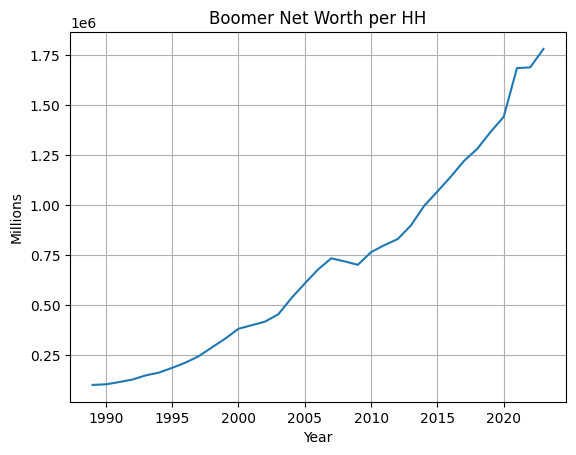

In [51]:
# Plot the general trends
plot_boomer_filtered['Net Worth per HH'].plot()

plt.title('Boomer Net Worth per HH')
plt.xlabel('Year')
plt.ylabel('Millions')
plt.grid(True)
plt.show()

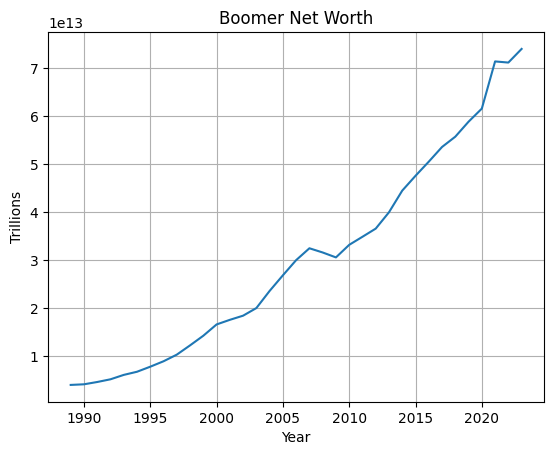

In [45]:
# Plot the general trends
plot_boomer_filtered["Net worth"].plot()

plt.title('Boomer Net Worth')
plt.xlabel('Year')
plt.ylabel('Trillions')
plt.grid(True)
plt.show()

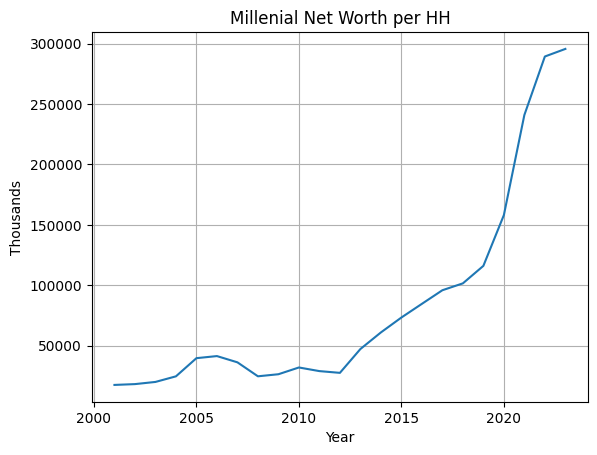

In [58]:
plot_mill_filtered['Net Worth per HH'].plot()

plt.title('Millenial Net Worth per HH')
plt.xlabel('Year')
plt.ylabel('In Dollars')
plt.grid(True)
plt.show()

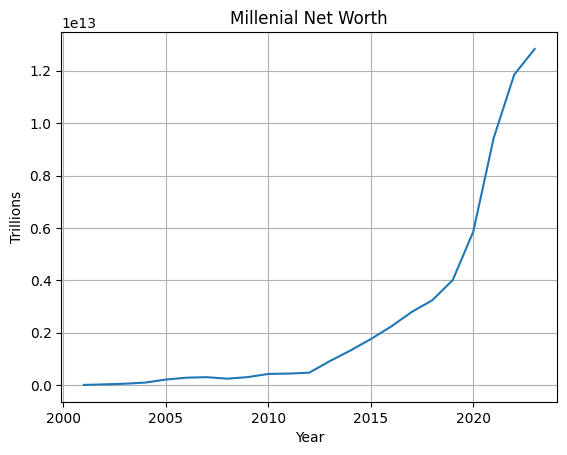

In [59]:
# Plot the general trends
plot_mill_filtered["Net worth"].plot()

plt.title('Millenial Net Worth')
plt.xlabel('Year')
plt.ylabel('Trillions')
plt.grid(True)
plt.show()

In [60]:
# Using the DataFrame, reset the index so the date information is no longer the index
plot_boomer_filtered_update = plot_boomer_filtered.reset_index()


wealth_gap_prophet_df_babyboom = plot_boomer_filtered_update[["Year", "Net worth"]]
# wealth_gap_prophet_df_genx = wealth_gap_prophet_df_update[["Year (Q4)","GenX"]]
# wealth_gap_prophet_df_millennial = wealth_gap_prophet_df_update[["Year (Q4)","Millennial"]]
# wealth_gap_prophet_df_silent = wealth_gap_prophet_df_update["Silent"]

# Label the columns ds and y so that the syntax is recognized by Prophet
# wealth_gap_prophet_df_genx.columns = ['ds', 'y']
wealth_gap_prophet_df_babyboom.columns = ['ds', 'y']
# wealth_gap_prophet_df_millennial.columns = ['ds', 'y']

# change to date time object
# wealth_gap_prophet_df_genx['ds'] = pd.to_datetime(wealth_gap_prophet_df_genx['ds'], format='%Y')
wealth_gap_prophet_df_babyboom['ds'] = pd.to_datetime(wealth_gap_prophet_df_babyboom['ds'], format='%Y')
# wealth_gap_prophet_df_millennial['ds'] = pd.to_datetime(wealth_gap_prophet_df_millennial['ds'], format='%Y')


wealth_gap_prophet_df_babyboom



<ipython-input-60-319d698a85d9>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wealth_gap_prophet_df_babyboom['ds'] = pd.to_datetime(wealth_gap_prophet_df_babyboom['ds'], format='%Y')


,ds,y
0,1989-01-01,4.041230e+12
1,1990-01-01,4.171210e+12
2,1991-01-01,4.649668e+12
3,1992-01-01,5.211829e+12
4,1993-01-01,6.127240e+12
5,1994-01-01,6.781565e+12
6,1995-01-01,7.834984e+12
7,1996-01-01,8.963166e+12
8,1997-01-01,1.034138e+13
9,1998-01-01,1.227284e+13


In [61]:
# Create a Prophet model for gen x
model_genx = Prophet()

In [62]:
# Create a Prophet model for Boomer
model_boomer = Prophet()

In [63]:
# Create a Prophet model for millennial
model_millennial = Prophet()

In [64]:
# wealth_gap_prophet_df_genx.columns = ['ds', 'y']
wealth_gap_prophet_df_babyboom.columns = ['ds', 'y']
# wealth_gap_prophet_df_millennial.columns = ['ds', 'y']

In [ ]:
# Fit the Gen X Prophet model
# model_genx.fit(wealth_gap_prophet_df_genx)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp50msgspe/411jbpye.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp50msgspe/ch9xepgv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14481', 'data', 'file=/tmp/tmp50msgspe/411jbpye.json', 'init=/tmp/tmp50msgspe/ch9xepgv.json', 'output', 'file=/tmp/tmp50msgspe/prophet_model3x37sa5n/prophet_model-20240514035839.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:58:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:58:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [65]:
# Fit the Boomer Prophet model
model_boomer.fit(wealth_gap_prophet_df_babyboom)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpces8dr/t4dmlfvw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkpces8dr/7n3r13av.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46376', 'data', 'file=/tmp/tmpkpces8dr/t4dmlfvw.json', 'init=/tmp/tmpkpces8dr/7n3r13av.json', 'output', 'file=/tmp/tmpkpces8dr/prophet_modelw2z9shwu/prophet_model-20240514062029.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
06:20:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:20:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Fit the Millenial Prophet model
# model_millennial.fit(wealth_gap_prophet_df_millennial)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp50msgspe/xekkns3r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp50msgspe/a0ph6k3b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=93738', 'data', 'file=/tmp/tmp50msgspe/xekkns3r.json', 'init=/tmp/tmp50msgspe/a0ph6k3b.json', 'output', 'file=/tmp/tmp50msgspe/prophet_modellp4pb2j0/prophet_model-20240514035844.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
03:58:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:58:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [79]:
# Forecast 15 years of weekly future trends data for Gen X
# future_genx = model_genx.make_future_dataframe(periods=18, freq='Y')
# future_millenial = model_millennial.make_future_dataframe(periods=18, freq='Y')
future_boomer = model_boomer.make_future_dataframe(periods=18, freq='Y')

# Display the last five rows
future_boomer.tail()

,ds
48,2036-12-31
49,2037-12-31
50,2038-12-31
51,2039-12-31
52,2040-12-31


In [80]:
# Make predictions for Boomes using the future_canada DataFrame
forecast_boomer = model_boomer.predict(future_boomer)

# Display the first five rows of the forecast_canada DataFrame
forecast_boomer

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1989-01-01,1.298888e+12,4.219852e+11,4.028402e+12,1.298888e+12,1.298888e+12,9.087080e+11,9.087080e+11,9.087080e+11,9.087080e+11,9.087080e+11,9.087080e+11,0.0,0.0,0.0,2.207596e+12
1,1990-01-01,2.444499e+12,1.160290e+12,4.914349e+12,2.444499e+12,2.444499e+12,6.429049e+11,6.429049e+11,6.429049e+11,6.429049e+11,6.429049e+11,6.429049e+11,0.0,0.0,0.0,3.087404e+12
2,1991-01-01,3.590110e+12,1.997615e+12,5.946842e+12,3.590110e+12,3.590110e+12,4.025928e+11,4.025928e+11,4.025928e+11,4.025928e+11,4.025928e+11,4.025928e+11,0.0,0.0,0.0,3.992703e+12
3,1992-01-01,4.735722e+12,3.053344e+12,6.782078e+12,4.735722e+12,4.735722e+12,1.879524e+11,1.879524e+11,1.879524e+11,1.879524e+11,1.879524e+11,1.879524e+11,0.0,0.0,0.0,4.923674e+12
4,1993-01-01,5.884471e+12,4.892320e+12,8.666030e+12,5.884471e+12,5.884471e+12,9.087080e+11,9.087080e+11,9.087080e+11,9.087080e+11,9.087080e+11,9.087080e+11,0.0,0.0,0.0,6.793179e+12
5,1994-01-01,7.030408e+12,5.798556e+12,9.447032e+12,7.030408e+12,7.030408e+12,6.429049e+11,6.429049e+11,6.429049e+11,6.429049e+11,6.429049e+11,6.429049e+11,0.0,0.0,0.0,7.673313e+12
6,1995-01-01,8.176984e+12,6.720570e+12,1.058152e+13,8.176984e+12,8.176984e+12,4.025928e+11,4.025928e+11,4.025928e+11,4.025928e+11,4.025928e+11,4.025928e+11,0.0,0.0,0.0,8.579577e+12
7,1996-01-01,9.324428e+12,7.585784e+12,1.149339e+13,9.324428e+12,9.324428e+12,1.879524e+11,1.879524e+11,1.879524e+11,1.879524e+11,1.879524e+11,1.879524e+11,0.0,0.0,0.0,9.512381e+12
8,1997-01-01,1.047502e+13,9.556154e+12,1.335738e+13,1.047502e+13,1.047502e+13,9.087080e+11,9.087080e+11,9.087080e+11,9.087080e+11,9.087080e+11,9.087080e+11,0.0,0.0,0.0,1.138372e+13
9,1998-01-01,1.225475e+13,1.094937e+13,1.485595e+13,1.225475e+13,1.225475e+13,6.429049e+11,6.429049e+11,6.429049e+11,6.429049e+11,6.429049e+11,6.429049e+11,0.0,0.0,0.0,1.289765e+13


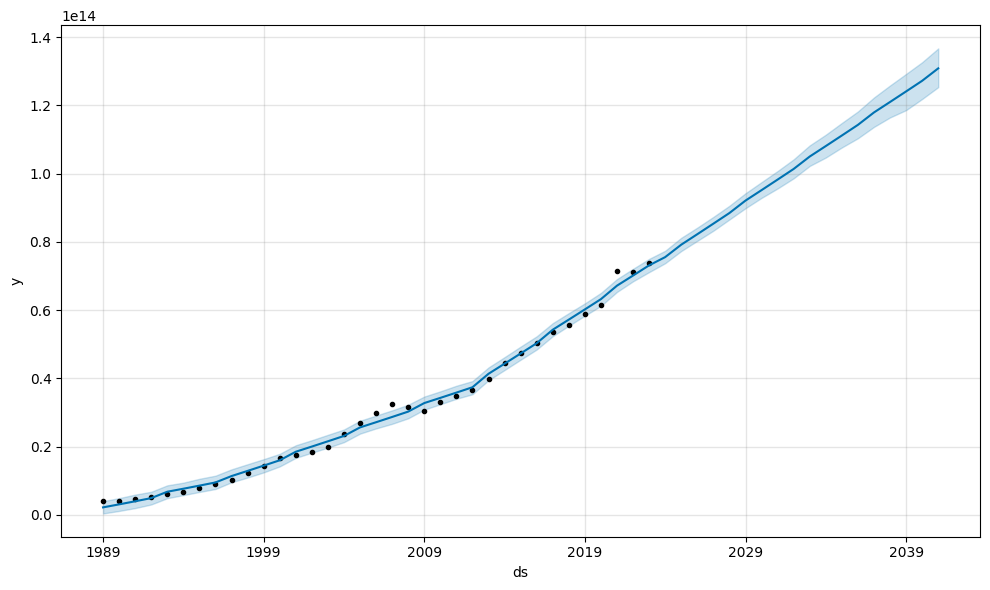

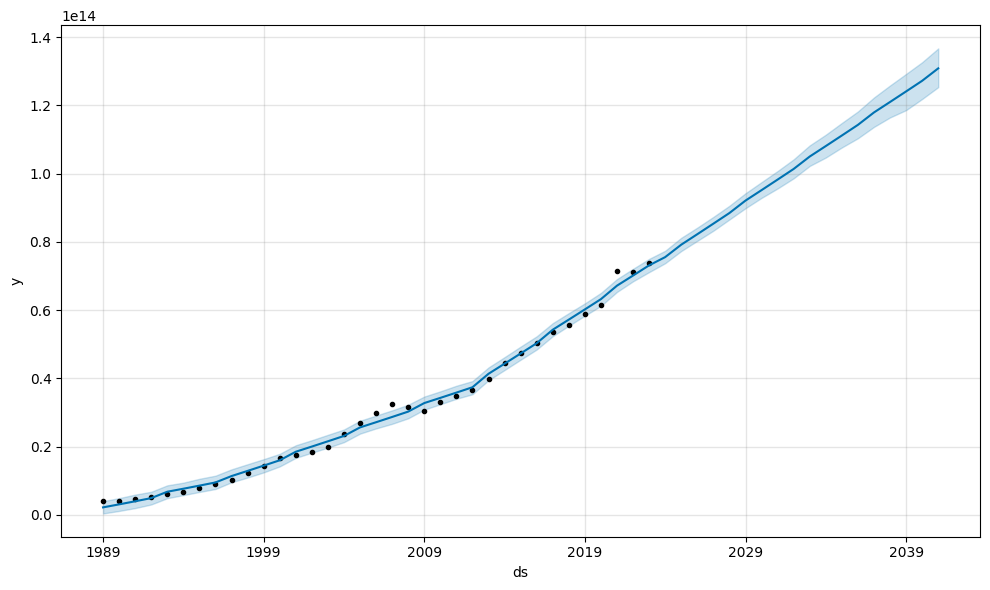

In [81]:
# Plot the Prophet predictions for genx
model_boomer.plot(forecast_boomer)

In [82]:
# Set the index in the forecast_canada DataFrame to the ds datetime column
forecast_boomer = forecast_boomer.set_index('ds')

# Display the forecast_canada DataFrame
forecast_boomer.tail()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2036-12-31,1.179468e+14,1.137057e+14,1.223261e+14,1.142250e+14,1.217387e+14,-8.811806e+08,-8.811806e+08,-8.811806e+08,-8.811806e+08,-8.811806e+08,-8.811806e+08,0.0,0.0,0.0,1.179460e+14
2037-12-31,1.211741e+14,1.164762e+14,1.258497e+14,1.170924e+14,1.254823e+14,-1.638181e+11,-1.638181e+11,-1.638181e+11,-1.638181e+11,-1.638181e+11,-1.638181e+11,0.0,0.0,0.0,1.210103e+14
2038-12-31,1.244013e+14,1.186212e+14,1.292316e+14,1.198615e+14,1.291271e+14,-3.008143e+11,-3.008143e+11,-3.008143e+11,-3.008143e+11,-3.008143e+11,-3.008143e+11,0.0,0.0,0.0,1.241005e+14
2039-12-31,1.276286e+14,1.218864e+14,1.326637e+14,1.226677e+14,1.326431e+14,-4.118710e+11,-4.118710e+11,-4.118710e+11,-4.118710e+11,-4.118710e+11,-4.118710e+11,0.0,0.0,0.0,1.272167e+14
2040-12-31,1.308647e+14,1.253543e+14,1.367065e+14,1.254620e+14,1.362660e+14,-8.811806e+08,-8.811806e+08,-8.811806e+08,-8.811806e+08,-8.811806e+08,-8.811806e+08,0.0,0.0,0.0,1.308638e+14


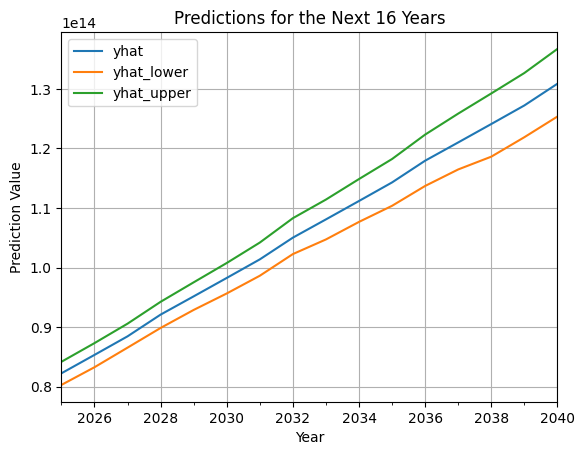

In [84]:
# Plot predictions for our forecast_canada DataFrame for the 52 week period
# forecast_genx[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-15:,:].plot()

# last_15_years =
forecast_boomer[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-16:].plot()
# forecast_genx[['yhat', 'yhat_lower', 'yhat_upper']].plot()

plt.title('Predictions for the Next 16 Years')
plt.xlabel('Year')
plt.ylabel('Prediction Value')
plt.grid(True)
plt.show()

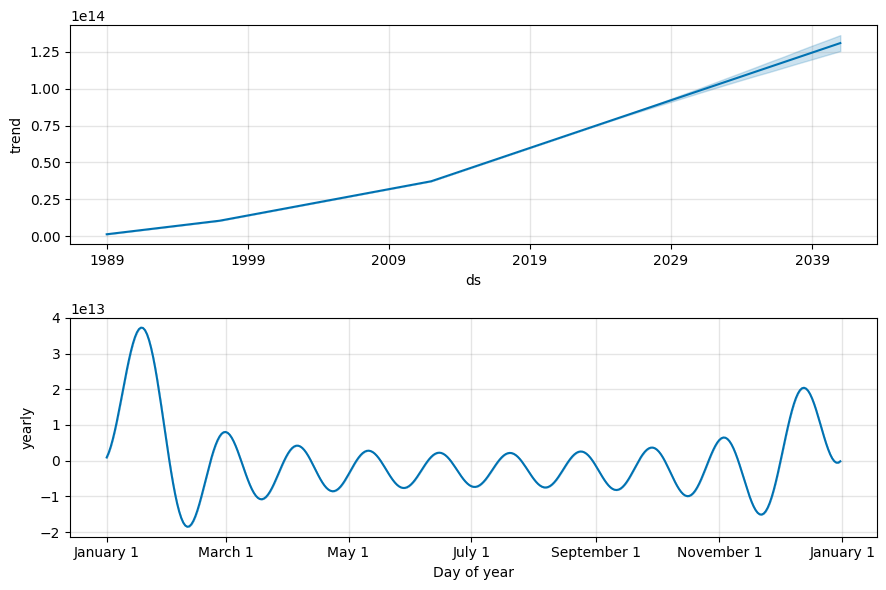

In [85]:
# Reset the index in the forecast_canada DataFrame
forecast_boomer_reset_i = forecast_boomer.reset_index()
# forecast_boomer_reset_i


# Use the plot_components function to visualize the forecast results
# for the forecast_canada DataFrame

fig_boomer = model_boomer.plot_components(forecast_boomer_reset_i)
# forecast_genx_reset_i =
# model_genx.plot_components(forecast_genx_reset_i)